In [63]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(12,8)

#Read in the data
df= pd.read_csv("/Users/alexreichegger/Desktop/Python for Data Analysis/movies.csv")

In [10]:
# look at the data head
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [13]:
#Analyse if there is missing data

for col in df.columns:
    pct_mis=np.mean(df[col].isnull())
    print("{} - {}%".format(col, pct_mis))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [16]:
#Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [64]:
#Deleting the missing values
df= df.dropna()

In [65]:
#Change the Data type to integers
df["gross"]=df["gross"].astype("int64")
df["budget"]=df["budget"].astype("int64")

In [66]:
#Create correct year column
df["yearcorrect"]=df["released"].str.extract(pat="([0-9]{4})").astype(int)

In [67]:
df=df.sort_values(by=["gross"],inplace=False,ascending=False)

In [68]:
pd.set_option("display.max_rows",None)

Text(0, 0.5, 'Gross Earnings')

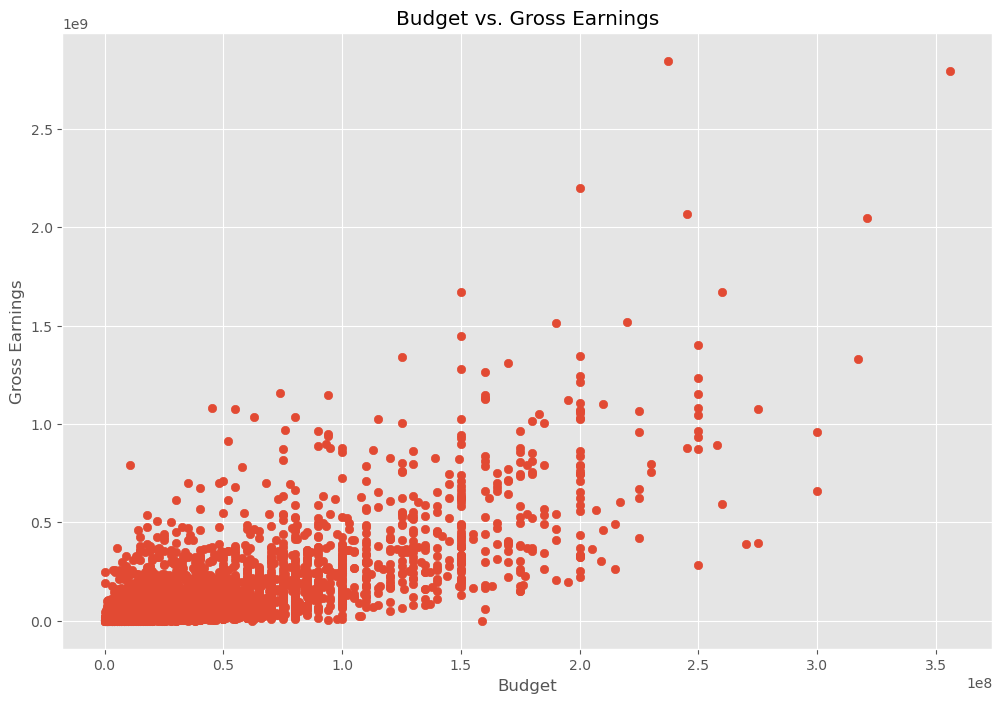

In [69]:
#Making a scatterplot with budget and gross revenue

plt.scatter(x=df["budget"],y=df["gross"])
plt.title("Budget vs. Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross Earnings")

In [70]:
df=df.drop("year", axis=1)

Text(0, 0.5, 'Gross Earnings (Billions)')

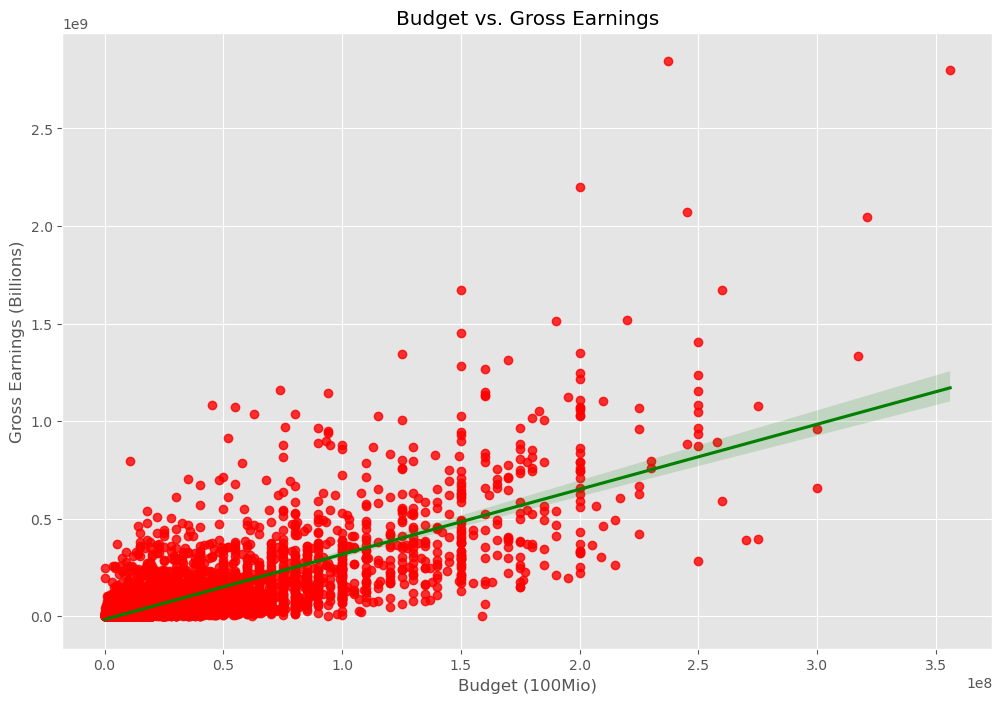

In [93]:
#Plot Budget vs. Gross Earning using seaborn

sns.regplot(x="budget",y="gross",data=df,scatter_kws={"color":"red"},line_kws={"color":"green"})
plt.title("Budget vs. Gross Earnings")
plt.xlabel("Budget (100Mio)")
plt.ylabel("Gross Earnings (Billions)")

In [94]:
#Correlation between the numeric variables of the Dataset

df.corr(method="pearson") #Pearson Corr

,score,votes,budget,gross,runtime,yearcorrect
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


Text(120.72222222222221, 0.5, 'Movie Features')

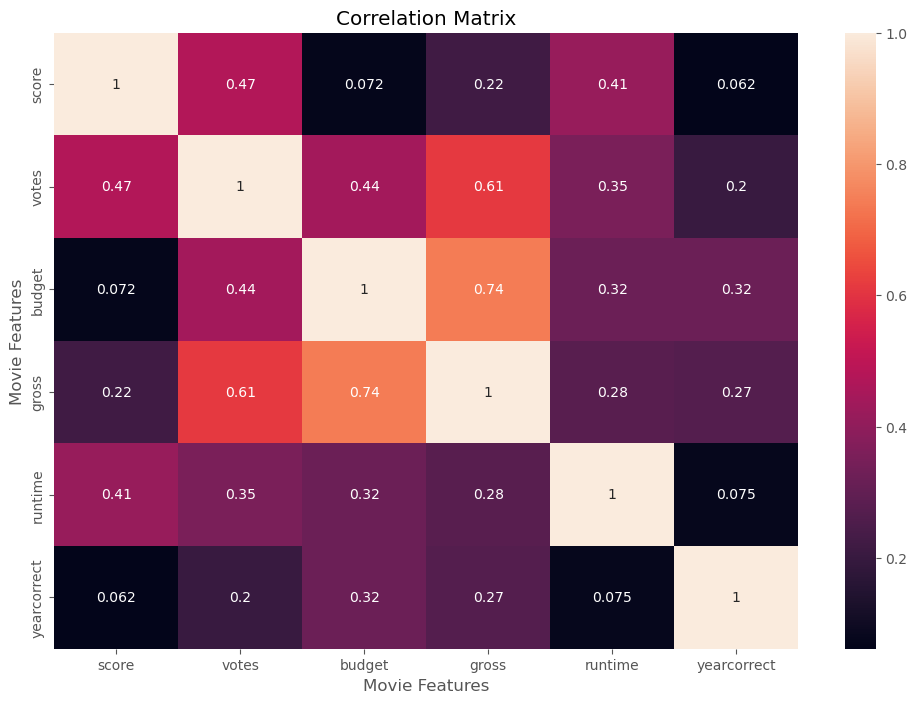

In [56]:
correlation_matrix= df.corr(method="pearson")
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

In [86]:
correlation_mat= df.corr()
corrs_pairs= correlation_mat.unstack()
corrs_pairs

score        score          1.000000
             votes          0.474256
             budget         0.072001
             gross          0.222556
             runtime        0.414068
             yearcorrect    0.061923
votes        score          0.474256
             votes          1.000000
             budget         0.439675
             gross          0.614751
             runtime        0.352303
             yearcorrect    0.203098
budget       score          0.072001
             votes          0.439675
             budget         1.000000
             gross          0.740247
             runtime        0.318695
             yearcorrect    0.320312
gross        score          0.222556
             votes          0.614751
             budget         0.740247
             gross          1.000000
             runtime        0.275796
             yearcorrect    0.268721
runtime      score          0.414068
             votes          0.352303
             budget         0.318695
 

In [87]:
sorted_pairs= corrs_pairs.sort_values()
sorted_pairs

score        yearcorrect    0.061923
yearcorrect  score          0.061923
score        budget         0.072001
budget       score          0.072001
runtime      yearcorrect    0.075294
yearcorrect  runtime        0.075294
             votes          0.203098
votes        yearcorrect    0.203098
score        gross          0.222556
gross        score          0.222556
             yearcorrect    0.268721
yearcorrect  gross          0.268721
runtime      gross          0.275796
gross        runtime        0.275796
runtime      budget         0.318695
budget       runtime        0.318695
             yearcorrect    0.320312
yearcorrect  budget         0.320312
votes        runtime        0.352303
runtime      votes          0.352303
             score          0.414068
score        runtime        0.414068
budget       votes          0.439675
votes        budget         0.439675
             score          0.474256
score        votes          0.474256
gross        votes          0.614751
v

In [90]:
high_corr= sorted_pairs[(sorted_pairs)>0.3]
high_corr

runtime      budget         0.318695
budget       runtime        0.318695
             yearcorrect    0.320312
yearcorrect  budget         0.320312
votes        runtime        0.352303
runtime      votes          0.352303
             score          0.414068
score        runtime        0.414068
budget       votes          0.439675
votes        budget         0.439675
             score          0.474256
score        votes          0.474256
gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
score        score          1.000000
gross        gross          1.000000
budget       budget         1.000000
votes        votes          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

Text(0, 0.5, 'Runtime (min)')

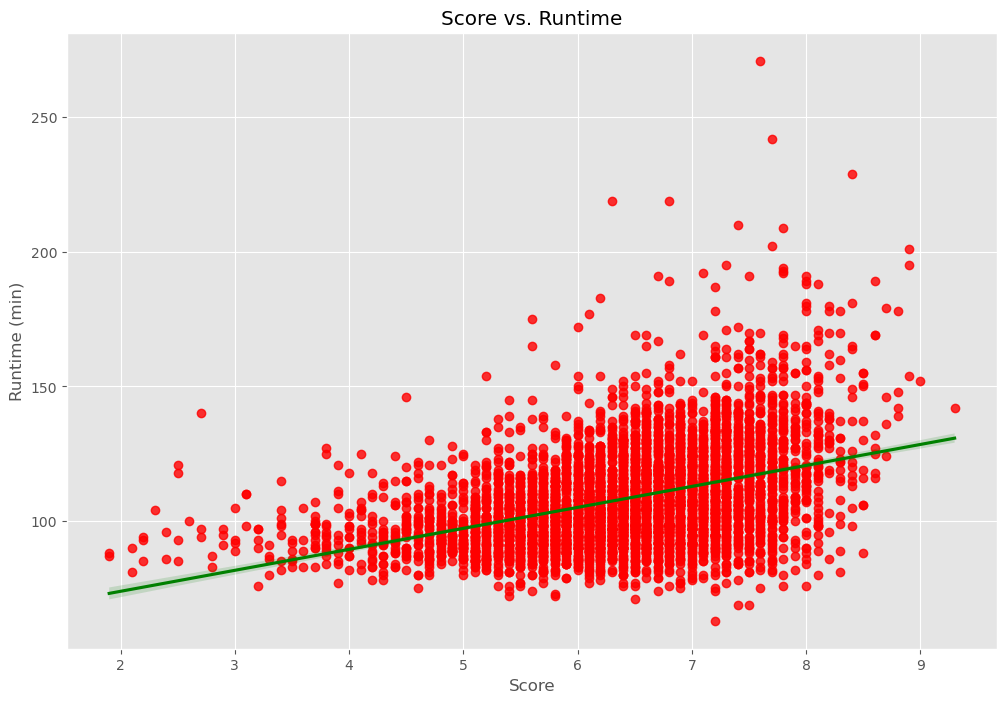

In [99]:
#Plot Runtime vs. Score

sns.regplot(x="score",y="runtime",data=df,scatter_kws={"color":"red"},line_kws={"color":"green"})
plt.title("Score vs. Runtime")
plt.xlabel("Score")
plt.ylabel("Runtime (min)")